In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
df=pd.read_csv("mxmh_survey_results.csv")

In [6]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [16]:
df = df.loc[df['Music effects'] == 'Improve']

In [17]:
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
7,8/27/2022 22:18:59,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [18]:
# Extract Anxiety and Depression scores
anxiety_depression_scores = df[['Anxiety', 'Depression']].values.tolist()

# Extract Frequency values for music genres
frequency_values = df[['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
                       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
                       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
                       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
                       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
                       'Frequency [Video game music]']]

# Format the frequency values as "Frequency (genre): value"
formatted_frequency_values = []
for row in frequency_values.itertuples(index=False):
    genre_frequency = []
    for i, value in enumerate(row):
        genre = frequency_values.columns[i].split('[')[1].split(']')[0]
        genre_frequency.append(f"Frequency ({genre}): {value}")
    formatted_frequency_values.append(genre_frequency)

result_list = [anxiety_depression_scores, formatted_frequency_values]

In [21]:
print((result_list[0][0]))

[9.0, 7.0]


In [19]:
print((result_list[1][0]))

['Frequency (Classical): Sometimes', 'Frequency (Country): Never', 'Frequency (EDM): Never', 'Frequency (Folk): Rarely', 'Frequency (Gospel): Sometimes', 'Frequency (Hip hop): Never', 'Frequency (Jazz): Very frequently', 'Frequency (K pop): Sometimes', 'Frequency (Latin): Very frequently', 'Frequency (Lofi): Sometimes', 'Frequency (Metal): Never', 'Frequency (Pop): Sometimes', 'Frequency (R&B): Sometimes', 'Frequency (Rap): Never', 'Frequency (Rock): Never', 'Frequency (Video game music): Never']


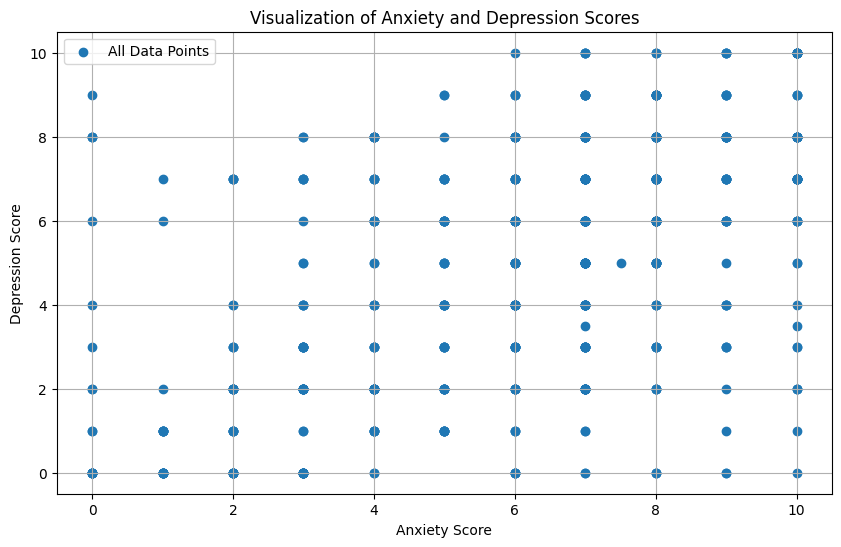

In [28]:
plt.figure(figsize=(10, 6))
scores = zip(*anxiety_depression_scores)
plt.scatter(*scores, label='All Data Points')
plt.xlabel('Anxiety Score')
plt.ylabel('Depression Score')
plt.title('Visualization of Anxiety and Depression Scores')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

def compare_scores(input_scores, result_list):
    min_distance = float('inf')
    closest_match = None

    for result_scores, frequencies in zip(result_list[0], result_list[1]):
        distance = euclidean_distance(input_scores, result_scores)
        if distance < min_distance:
            min_distance = distance
            closest_match = frequencies

    return closest_match

In [29]:
compare_scores([6,8],result_list)

['Frequency (Classical): Never',
 'Frequency (Country): Never',
 'Frequency (EDM): Rarely',
 'Frequency (Folk): Never',
 'Frequency (Gospel): Never',
 'Frequency (Hip hop): Sometimes',
 'Frequency (Jazz): Never',
 'Frequency (K pop): Rarely',
 'Frequency (Latin): Rarely',
 'Frequency (Lofi): Never',
 'Frequency (Metal): Never',
 'Frequency (Pop): Very frequently',
 'Frequency (R&B): Never',
 'Frequency (Rap): Rarely',
 'Frequency (Rock): Never',
 'Frequency (Video game music): Never']

In [31]:
joblib.dump(result_list,"music_data.pkl")

['music_data.pkl']